In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from functions.Pre_processing_Casos_Graves import *
from functions.Pre_processing_models import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn import svm

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

import optuna
from sklearn.metrics import f1_score, precision_score, recall_score

Lendo o dataset

In [2]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

Utilizando a class random forest para fazer o pré processamento

In [3]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [4]:
Pre_processing_models = Pre_processing_models(df)
Pre_processing_models.run_graves()

df = Pre_processing_models.df
df = df[list_features]
df

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.460870,0,1,2020-05-30
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.747826,1,0,2020-06-02
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2020-06-01
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.591304,0,1,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.669565,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.634783,1,0,2022-06-12


In [5]:
df2 = pd.DataFrame()
df2 = df
df2.set_index('data_notificacao', inplace=True)
df2.sort_index(inplace=True)
df2

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-02-26,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.356522,0,1
2020-02-26,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.278261,0,1
2020-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.217391,1,0
2020-02-27,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.278261,0,1
2020-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.260870,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.556522,0,1
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.573913,1,0


#### Criação de função para executação do modelo com "grid search":

In [6]:
def GradientBoosting_model (X_train, y_train):
    param_grid = {'learning_rate': [0.1, 0.3, 0.5],
                  'subsample'    : [0.1, 0.2, 0.4],
                  'n_estimators' : [200, 500],
                  'max_depth'    : [6,8]
                 }
    
    """param_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }"""

    # Init classifier
    gb_cl = GradientBoostingClassifier()
    #gb_cl = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1)

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(gb_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

#### Aplicação do modelo para o dataset completo:

In [8]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 2)

#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]
#list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

X = df2.drop(labels=['death'], axis=1)
y = df2['death']


for random_state in list_random_states:
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores.append(mean_test_score)
    std_test_scores.append(std_test_score)
    best_scores.append(best_score)
    best_params.append(best_param)


########################################

best_score: 0.8022241908098536
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8021866169579747
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.802621472983043
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8035591234138879
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8020775518183806
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########

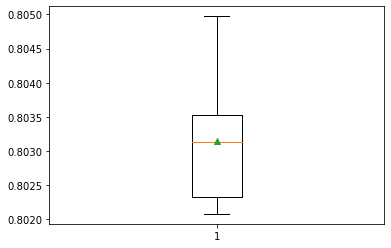

In [9]:
from matplotlib import pyplot

pyplot.boxplot(best_scores, showmeans=True)
pyplot.show()

## Testando o modelo para os melhores parâmetros:

In [10]:
print(f'Best_score = {max(best_scores)}')
index = best_scores.index(max(best_scores))
print(f'Best_params = {best_params[index]}')

Best_score = 0.8049743999263768
Best_params = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}


In [11]:
# parametrizando o modelo final
final_cl = GradientBoostingClassifier(max_depth=6, n_estimators=200, learning_rate=0.1, subsample=0.4)

#treinando o modelo final
final_cl.fit(X_train, y_train)


preds = final_cl.predict(X_test)

accuracy_score(y_test, preds)

0.6972416632358995

In [12]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.4395671391556165
0.6160834172849547
0.6972416632358995
0.6935936117076604


In [13]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.45705229793977814
0.6192936684359625
0.6972416632358995
0.6905355975307464


In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.613676335797231

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


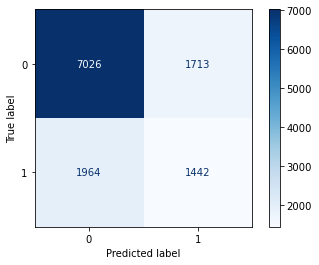

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      8739
           1       0.46      0.42      0.44      3406

    accuracy                           0.70     12145
   macro avg       0.62      0.61      0.62     12145
weighted avg       0.69      0.70      0.69     12145



In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

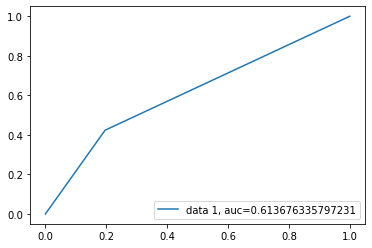

In [16]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Aplicando para os períodos de 6 meses:

In [17]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [18]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-08-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_3 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_4 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2022-06-13')]

#### Criando listas para armazenamento dos melhores parâmetros:

In [19]:
mean_test_scores_periodos_6meses = []
std_test_scores_periodos_6meses = []
best_scores_periodos_6meses = []
best_params_periodos_6meses = []

#### Período 1 (26/02/2020 até 31/08/2020):

In [20]:
random_forest = Random_forest(periodo_1)
random_forest.run_graves()

df_p1 = random_forest.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.486239,0,1,2020-05-30
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.788991,1,0,2020-06-02
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.605505,0,1,2020-06-01
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.623853,0,1,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.211009,1,0,2020-05-31
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.614679,0,1,2020-05-13
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.623853,0,1,2020-05-12
36276,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.752294,1,0,2020-07-31


In [21]:
df2_p1 = pd.DataFrame()
df2_p1 = df_p1
df2_p1.set_index('data_notificacao', inplace=True)
df2_p1.sort_index(inplace=True)
df2_p1

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-02-27,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.330275,0,1
2020-02-27,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.293578,0,1
2020-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.229358,1,0
2020-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.275229,1,0
2020-02-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.238532,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.504587,1,0
2020-08-30,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.467890,0,1
2020-08-30,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.788991,0,1


In [22]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_1 = []
std_test_scores_1 = []
best_scores_1 = []
best_params_1 = []

X = df2_p1.drop(labels=['death'], axis=1)
y = df2_p1['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_1)
std_test_scores_periodos_6meses.append(std_test_scores_1)
best_scores_periodos_6meses.append(best_scores_1)
best_params_periodos_6meses.append(best_params_1)


########################################

best_score: 0.8706313548454607
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8710194215230986
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8715256674751803
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8710780852453196
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.8704904102563773
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
#######

In [23]:
print(f'Best_score = {max(best_scores_periodos_6meses[0])}')
index = best_scores_periodos_6meses[0].index(max(best_scores_periodos_6meses[0]))
print(f'Best_params = {best_params_periodos_6meses[0][index]}')

Best_score = 0.8715256674751803
Best_params = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}


## Testando o modelo para os melhores parâmetros:

In [25]:
# parametrizando o modelo final
final_cl_p1 = GradientBoostingClassifier(max_depth=6, n_estimators=200, learning_rate=0.1, subsample=0.4)

#treinando o modelo final
final_cl_p1.fit(X_train, y_train)


preds = final_cl_p1.predict(X_test)

print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(f1_score(y_test, preds))

0.7055158512002933
0.39402028830752805
0.4787544599416153


#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


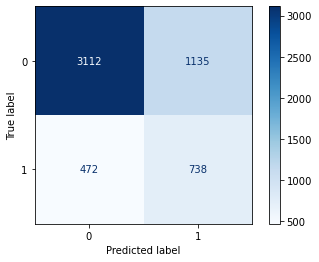

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      4247
           1       0.39      0.61      0.48      1210

    accuracy                           0.71      5457
   macro avg       0.63      0.67      0.64      5457
weighted avg       0.76      0.71      0.72      5457



In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

In [27]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.4787544599416153
0.6367721986848927
0.7055158512002933
0.724714268056953


In [28]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.39402028830752805
0.6311619298680498
0.7055158512002933
0.763139053822476


In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6713349432851969

#### Curva ROC:

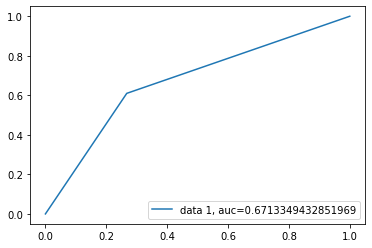

In [30]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 2 (01/09/2020 até 28/02/2021):

In [31]:
random_forest = Random_forest(periodo_2)
random_forest.run_graves()

df_p2 = random_forest.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.736842,0,1,2020-09-16
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.166667,0,1,2020-09-27
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.798246,1,0,2020-09-30
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.500000,0,1,2020-09-30
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.736842,1,0,2020-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.666667,1,0,2021-01-18
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.570175,1,0,2020-12-30
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.429825,0,1,2021-02-02
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0.798246,1,0,2021-01-13


In [32]:
df2_p2 = pd.DataFrame()
df2_p2 = df_p2
df2_p2.set_index('data_notificacao', inplace=True)
df2_p2.sort_index(inplace=True)
df2_p2

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.201754,1,0
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.500000,0,1
2020-09-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.026316,0,1
2020-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,0,1
2020-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.552632,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.789474,0,1
2021-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0.464912,1,0
2021-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.368421,1,0


In [33]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_2 = []
std_test_scores_2 = []
best_scores_2 = []
best_params_2 = []

X = df2_p2.drop(labels=['death'], axis=1)
y = df2_p2['death']

for random_state in list_random_states:
    
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_2.append(mean_test_score)
    std_test_scores_2.append(std_test_score)
    best_scores_2.append(best_score)
    best_params_2.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_2)
std_test_scores_periodos_6meses.append(std_test_scores_2)
best_scores_periodos_6meses.append(best_scores_2)
best_params_periodos_6meses.append(best_params_2)


########################################

best_score: 0.7304201632395951
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7273221959083274
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7201158416655358
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7274377413036188
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7292780998522047
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
#######

In [34]:
X_train.index

Index(['2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02',
       '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02',
       ...
       '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07',
       '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07'],
      dtype='object', name='data_notificacao', length=3383)

In [35]:
X_test.index

Index(['2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07',
       '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07',
       ...
       '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27',
       '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27'],
      dtype='object', name='data_notificacao', length=1691)

In [36]:
print(f'Best_score = {max(best_scores_periodos_6meses[1])}')
index = best_scores_periodos_6meses[1].index(max(best_scores_periodos_6meses[1]))
print(f'Best_params = {best_params_periodos_6meses[1][index]}')

Best_score = 0.7304201632395951
Best_params = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}


## Testando o modelo para os melhores parâmetros:

In [37]:
# parametrizando o modelo final
final_cl_p2 = GradientBoostingClassifier(max_depth=6, n_estimators=200, learning_rate=0.1, subsample=0.4)

#treinando o modelo final
final_cl_p2.fit(X_train, y_train)


preds = final_cl_p2.predict(X_test)

print(accuracy_score(y_test, preds))
print(precision_score(y_test, preds))
print(f1_score(y_test, preds))

0.693672383205204
0.5802752293577982
0.49414062499999994


In [38]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.49414062499999994
0.6372314660199321
0.693672383205204
0.6808102851359966


In [39]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.5802752293577982
0.6566714792207318
0.693672383205204
0.6799382259264743


In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6321804787191394

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


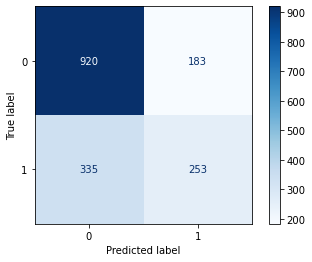

              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1103
           1       0.58      0.43      0.49       588

    accuracy                           0.69      1691
   macro avg       0.66      0.63      0.64      1691
weighted avg       0.68      0.69      0.68      1691



In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

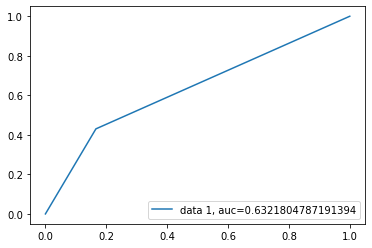

In [42]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 3 (01/03/2021 até 31/08/2021):

In [43]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p3 = random_forest.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.429825,0,1,2021-05-07
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.315789,1,0,2021-04-27
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.368421,1,0,2021-04-14
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.394737,0,1,2021-04-10
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.377193,0,1,2021-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,1,0,2021-06-09
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.508772,1,0,2021-05-29
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.403509,0,1,2021-07-01
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,0,1,2021-06-18


In [44]:
df2_p3 = pd.DataFrame()
df2_p3 = df_p3
df2_p3.set_index('data_notificacao', inplace=True)
df2_p3.sort_index(inplace=True)
df2_p3

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-03-02,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.552632,1,0
2021-03-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.421053,1,0
2021-03-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,0,1
2021-03-02,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.622807,1,0
2021-03-02,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.543860,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.324561,1,0
2021-08-30,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.657895,0,1


In [45]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_3 = []
std_test_scores_3 = []
best_scores_3 = []
best_params_3 = []

X = df2_p3.drop(labels=['death'], axis=1)
y = df2_p3['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_3.append(mean_test_score)
    std_test_scores_3.append(std_test_score)
    best_scores_3.append(best_score)
    best_params_3.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_3)
std_test_scores_periodos_6meses.append(std_test_scores_3)
best_scores_periodos_6meses.append(best_scores_3)
best_params_periodos_6meses.append(best_params_3)


########################################

best_score: 0.7467762264049128
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7423416494678303
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7506295316646738
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.746650396027253
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7477787975249981
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########

In [46]:
X_train.index

Index(['2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02',
       '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02',
       ...
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02'],
      dtype='object', name='data_notificacao', length=5810)

In [47]:
X_test.index

Index(['2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       ...
       '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30',
       '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30'],
      dtype='object', name='data_notificacao', length=2904)

In [48]:
print(f'Best_score = {max(best_scores_periodos_6meses[2])}')
index = best_scores_periodos_6meses[2].index(max(best_scores_periodos_6meses[2]))
print(f'Best_params = {best_params_periodos_6meses[2][index]}')

Best_score = 0.7512470144801249
Best_params = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}


## Testando o modelo para os melhores parâmetros:

In [49]:
# parametrizando o modelo final
final_cl_p3 = GradientBoostingClassifier(max_depth=6, n_estimators=200, learning_rate=0.1, subsample=0.4)

#treinando o modelo final
final_cl_p3.fit(X_train, y_train)


preds = final_cl_p3.predict(X_test)

accuracy_score(y_test, preds)

0.7331267217630854

In [50]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.5254133496631966
0.6698923035741133
0.7331267217630855
0.7275047789972681


In [51]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.5644736842105263
0.6786920659858602
0.7331267217630854
0.7242378256607349


In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6642175151136761

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


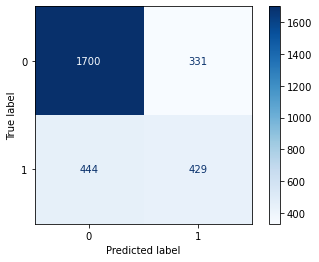

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2031
           1       0.56      0.49      0.53       873

    accuracy                           0.73      2904
   macro avg       0.68      0.66      0.67      2904
weighted avg       0.72      0.73      0.73      2904



In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p3, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

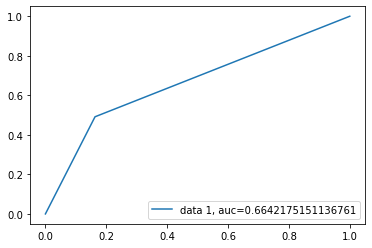

In [54]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 4 (01/09/2021 até 28/02/2022):

In [55]:
random_forest = Random_forest(periodo_4)
random_forest.run_graves()

df_p4 = random_forest.df
df_p4 = df_p4[list_features]
df_p4

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1804,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.252174,0,1,2021-09-18
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.243478,1,0,2021-09-25
1807,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.721739,0,1,2021-09-08
1808,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2021-10-07
1809,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.530435,0,1,2021-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36360,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.234783,0,1,2022-02-26
36361,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.582609,0,1,2021-12-30
36368,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.756522,0,1,2022-02-02
36385,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.800000,0,1,2021-11-22


In [56]:
df2_p4 = pd.DataFrame()
df2_p4 = df_p4
df2_p4.set_index('data_notificacao', inplace=True)
df2_p4.sort_index(inplace=True)
df2_p4

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.617391,0,1
2021-09-02,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.426087,0,1
2021-09-02,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0.382609,0,1
2021-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.765217,1,0
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.095652,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.591304,1,0
2022-02-27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.460870,1,0
2022-02-27,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1


In [57]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_4 = []
std_test_scores_4 = []
best_scores_4 = []
best_params_4 = []

X = df2_p4.drop(labels=['death'], axis=1)
y = df2_p4['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_4.append(mean_test_score)
    std_test_scores_4.append(std_test_score)
    best_scores_4.append(best_score)
    best_params_4.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_4)
std_test_scores_periodos_6meses.append(std_test_scores_4)
best_scores_periodos_6meses.append(best_scores_4)
best_params_periodos_6meses.append(best_params_4)


########################################

best_score: 0.6269844312588424
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.6273437429428654
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.622914981830945
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.620467367291952
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.62184909060997
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
###########

In [58]:
X_train.index

Index(['2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02',
       '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02',
       ...
       '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
       '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11'],
      dtype='object', name='data_notificacao', length=2924)

In [59]:
X_test.index

Index(['2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
       '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
       ...
       '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27',
       '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27'],
      dtype='object', name='data_notificacao', length=1462)

In [60]:
print(f'Best_score = {max(best_scores_periodos_6meses[3])}')
index = best_scores_periodos_6meses[3].index(max(best_scores_periodos_6meses[3]))
print(f'Best_params = {best_params_periodos_6meses[3][index]}')

Best_score = 0.6291609525615044
Best_params = {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}


## Testando o modelo para os melhores parâmetros:

In [61]:
# parametrizando o modelo final
final_cl_p4 = GradientBoostingClassifier(max_depth=6, n_estimators=200, learning_rate=0.1, subsample=0.2)

#treinando o modelo final
final_cl_p4.fit(X_train, y_train)


preds = final_cl_p4.predict(X_test)

accuracy_score(y_test, preds)

0.6880984952120383

In [62]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.27848101265822783
0.539764066538538
0.6880984952120383
0.6630782301345804


In [63]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.35772357723577236
0.5563288938810441
0.6880984952120383
0.6500619092608235


In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.540569562956257

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


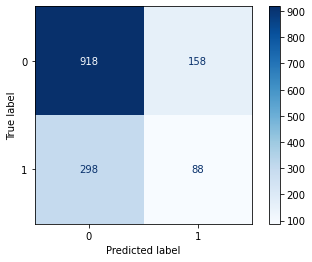

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1076
           1       0.36      0.23      0.28       386

    accuracy                           0.69      1462
   macro avg       0.56      0.54      0.54      1462
weighted avg       0.65      0.69      0.66      1462



In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p4, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

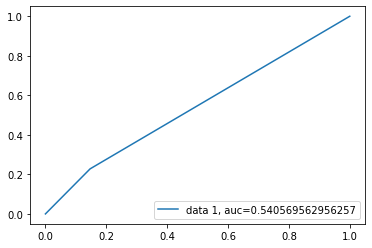

In [66]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 5 (01/03/2022 até 13/06/2022):

In [67]:
random_forest = Random_forest(periodo_5)
random_forest.run_graves()

df_p5 = random_forest.df
df_p5 = df_p5[list_features]
df_p5

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
2165,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.281818,0,1,2022-03-02
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,1,0,2022-03-07
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.554545,0,1,2022-03-12
2182,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.554545,0,1,2022-03-14
2185,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.700000,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.663636,1,0,2022-06-12


In [68]:
df2_p5 = pd.DataFrame()
df2_p5 = df_p5
df2_p5.set_index('data_notificacao', inplace=True)
df2_p5.sort_index(inplace=True)
df2_p5

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2022-03-02,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.281818,0,1
2022-03-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.636364,1,0
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.681818,0,1
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.836364,0,1
2022-03-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.427273,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.581818,0,1


In [69]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_5 = []
std_test_scores_5 = []
best_scores_5 = []
best_params_5 = []

X = df2_p5.drop(labels=['death'], axis=1)
y = df2_p5['death']

for random_state in list_random_states:
    
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_5.append(mean_test_score)
    std_test_scores_5.append(std_test_score)
    best_scores_5.append(best_score)
    best_params_5.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_5)
std_test_scores_periodos_6meses.append(std_test_scores_5)
best_scores_periodos_6meses.append(best_scores_5)
best_params_periodos_6meses.append(best_params_5)


########################################

best_score: 0.7561502718844714
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7583157648422179
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.2}
########################################

########################################

best_score: 0.7600480254947406
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7572316812266002
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.2}
########################################

########################################

best_score: 0.7557112453200214
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.2}
#######

In [70]:
X_train.index

Index(['2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       ...
       '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-06',
       '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06'],
      dtype='object', name='data_notificacao', length=1109)

In [71]:
X_test.index

Index(['2022-05-06', '2022-05-06', '2022-05-07', '2022-05-07', '2022-05-07',
       '2022-05-07', '2022-05-07', '2022-05-08', '2022-05-08', '2022-05-08',
       ...
       '2022-06-11', '2022-06-11', '2022-06-12', '2022-06-12', '2022-06-12',
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12'],
      dtype='object', name='data_notificacao', length=554)

In [72]:
print(f'Best_score = {max(best_scores_periodos_6meses[4])}')
index = best_scores_periodos_6meses[4].index(max(best_scores_periodos_6meses[4]))
print(f'Best_params = {best_params_periodos_6meses[4][index]}')

Best_score = 0.7600480254947406
Best_params = {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.2}


## Testando o modelo para os melhores parâmetros:

In [73]:
# parametrizando o modelo final
final_cl_p5 = GradientBoostingClassifier(max_depth=8, n_estimators=200, learning_rate=0.1, subsample=0.2)

#treinando o modelo final
final_cl_p5.fit(X_train, y_train)


preds = final_cl_p5.predict(X_test)

accuracy_score(y_test, preds)

0.8231046931407943

In [74]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.3552631578947369
0.6263763488218455
0.8231046931407943
0.8475733926829521


In [75]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.26732673267326734
0.6071733001114681
0.8231046931407943
0.8844488388877618


In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6911472342416091

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


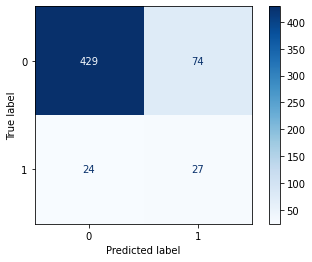

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       503
           1       0.27      0.53      0.36        51

    accuracy                           0.82       554
   macro avg       0.61      0.69      0.63       554
weighted avg       0.88      0.82      0.85       554



In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p5, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

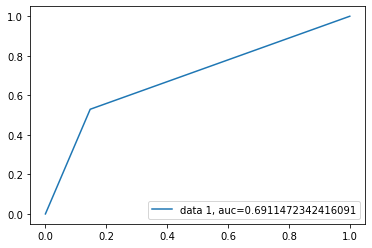

In [78]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Análise geral periodos de 6 meses 

In [23]:
from statistics import mean

print(f'Maior score: {max(best_scores_periodos_6meses)} \nMenor Score: {min(best_params_periodos_6meses)} \nMedia Scores: {mean(best_params_periodos_6meses)} ')
print(f'Desvio padrão médio: {mean(std_test_scores_periodos_6meses)} ')

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [ ]:
pyplot.boxplot(best_scores_periodos_6meses, showmeans=True)
pyplot.show()

## APLICANDO PARA PERIODO DE 3 MESES

In [29]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [30]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-05-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-06-01') & (df['data_notificacao'] < '2020-08-31')]
periodo_3 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2020-11-30')]
periodo_4 = df[(df['data_notificacao'] > '2020-12-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-05-31')]
periodo_6 = df[(df['data_notificacao'] > '2021-06-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_7 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2021-11-30')]
periodo_8 = df[(df['data_notificacao'] > '2021-12-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_9 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2025-05-31')]
periodo_10 = df[(df['data_notificacao'] > '2022-06-01') & (df['data_notificacao'] < '2022-06-13')]

In [31]:
mean_test_scores_periodos_3mese = []
std_test_scores_periodos_3meses = []
best_scores_periodos_3meses = []
best_params_periodos_3meses = []

#### Aplicando para perido 1 - 3 meses

In [32]:
random_forest = Random_forest(periodo_1)
random_forest.run_graves()

df_p1 = random_forest.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.486239,0,1
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.633028,0,1
25,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.642202,0,1
26,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.596330,0,1
27,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.467890,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.532110,1,0
36272,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.871560,1,0
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.614679,0,1
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.623853,0,1


In [33]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

for random_state in list_random_states:
    X = df_p1.drop("death",axis=1)
    y = df_p1['death']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_3mese.append(mean_test_scores)
std_test_scores_periodos_3meses.append(std_test_scores)
best_scores_periodos_3meses.append(best_scores)
best_params_periodos_3meses.append(best_params)


########################################

best_score: 0.8349617486338797
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8354754098360655
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8315737704918034
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8306448087431693
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.8341202185792349
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
#######

In [34]:
print(f'Best_score = {max(best_scores_periodos_3meses[0])}')
index = best_scores.index(max(best_scores_periodos_3meses[0]))
print(f'Best_params = {best_params_periodos_3meses[0][index]}')

ValueError: max() arg is an empty sequence

#### Aplicando periodo 2 - 3 meses

In [35]:
random_forest = Random_forest(periodo_2)
random_forest.run_graves()

df_p2 = random_forest.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.803738,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.635514,0,1
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.869159,0,1
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.626168,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.644860,1,0
36252,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.654206,1,0
36261,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.747664,0,1
36270,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.766355,1,0


In [37]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

for random_state in list_random_states:
    X = df_p2.drop("death",axis=1)
    y = df_p2['death']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_3mese.append(mean_test_scores)
std_test_scores_periodos_3meses.append(std_test_scores)
best_scores_periodos_3meses.append(best_scores)
best_params_periodos_3meses.append(best_params)


########################################

best_score: 0.7631794819149301
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7633098928925846
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7712869999657803
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7648802313246417
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.7740577969407658
best_params_: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.4}
#######

In [ ]:
print(f'Best_score = {max(best_scores_periodos_3meses[1])}')
index = best_scores.index(max(best_scores_periodos_3meses[1]))
print(f'Best_params = {best_params_periodos_3meses[1][index]}')

#### Aplicando periodo 3 - 3 meses

In [ ]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p3 = random_forest.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.807692,0,1
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182692,0,1
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.875000,1,0
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.548077,0,1
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.807692,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.576923,1,0
36169,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.586538,0,1
36235,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0.605769,0,1
36236,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.519231,0,1


In [ ]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

for random_state in list_random_states:
    X = df_p3.drop("death",axis=1)
    y = df_p3['death']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = GradientBoosting_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_3mese.append(mean_test_scores)
std_test_scores_periodos_3meses.append(std_test_scores)
best_scores_periodos_3meses.append(best_scores)
best_params_periodos_3meses.append(best_params)


In [ ]:
print(f'Best_score = {max(best_scores_periodos_3meses[2])}')
index = best_scores.index(max(best_scores_periodos_3meses[2]))
print(f'Best_params = {best_params_periodos_3meses[2][index]}')